## Data Analytics II

Implement logistic regression using Python/R to perform classification (Categorical values ) on
Social_Network_Ads.csv dataset.
Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [65]:
df= pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [23]:
print(df.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [29]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
X = df[['Gender', 'Age', 'EstimatedSalary']]
y= df['Purchased']
#split the data
X_train,X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [51]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#StandardScaler: Scales the features to have a mean of 0 and a standard deviation of 1.
#fit_transform: Fits the scaler to the training data and transforms it.
#transform: Transforms the test data using the same scaling parameters as the training data.


In [53]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [55]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:", cm)

Confusion Matrix: [[50  2]
 [ 7 21]]


In [57]:
#extract values
TN, FP, FN, TP = cm.ravel()
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [59]:
print(f"True Positives:{TP} ")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

True Positives:21 
False Positives (FP): 2
True Negatives (TN): 50
False Negatives (FN): 7


In [61]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.89
Error Rate: 0.11
Precision: 0.91
Recall: 0.75


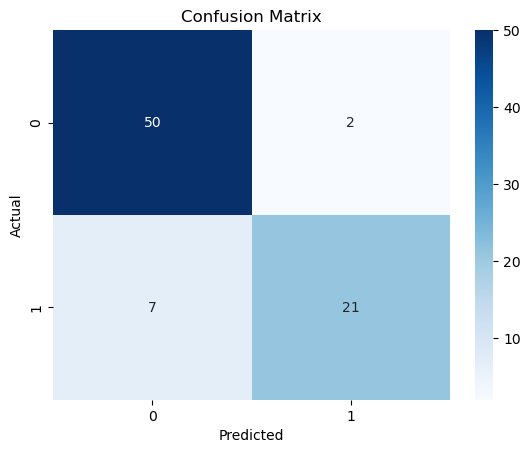

In [63]:
#Visualizing the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()